# Machine Learning "By Hand"

Recall from the previous lecture that the machine learning task has four major components: 

1. The <font color="green"><i>predictor variables</i> $X$</font>. 
2. The <font color="gold"><i>target variable</i> $Y$</font>, which we aim to predict using <font color="green">$X$</font>. 
3. The <font color="blue"> <i>model</i> $f$ </font>. We treat $\color{blue}{f}(\color{green}{X})$ as our estimate of $\color{gold}{Y}$. 
1. <font color="red"><i>The loss function</i> $\mathcal{L}$</font>. The quantity $\color{red}{\mathcal{L}}(\color{blue}{f}(\color{green}{X}), \color{gold}{Y})$ is a measure of how well the model $\color{blue}{f}$ "fits" the data $(\color{green}{X}, \color{gold}{Y})$. 

In this lecture, we will explore each of these components in an interpretable setting -- linear regression. This will help us understand what's really going on when we start using more complicated models from Python packages. 

## Linear Regression

In linear regression, we use a *linear* model for the data. In the 1-dimensional case, this means that our model $\color{blue}{f}$ has the form 

$$\color{blue}{f}(\color{green}{x}) = a\color{green}{x}+b \approx \color{gold}{y}\;.$$

There are two parameters: the slope $a$ and the intercept $b$. By changing the slope and intercept, we get different models. We say that $\color{blue}{f}$ belongs to a *family* of models $\color{blue}{\mathcal{M}}$, with each model corresponding to a different choice of $a$ and $b$. Our learning task now is to find good choices for $a$ and $b$, given some data. 

## Predictor and Target Data

Let's now generate some synthetic data to use as our example.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# controls random number generation
# always get the same data
np.random.seed(1234) 

# true model is linear with a = 1 and b = 1
a = 1
b = 1

n_points = 100

X = np.random.rand(n_points)
Y = a*X + b + 0.2*np.random.randn(n_points) # final term is random noise

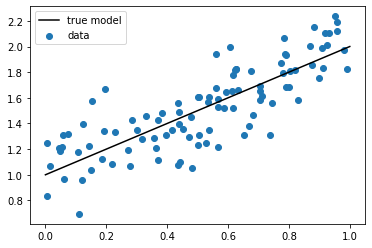

In [4]:
fig, ax = plt.subplots(1)

ax.plot([0,1], [1, 2], color = "black", label = "true model")
ax.scatter(X,Y, label = "data")
plt.legend()

When generating synthetic data, we know the "true" model. In practice, we don't have access to the true model, so our situation looks more like this: 

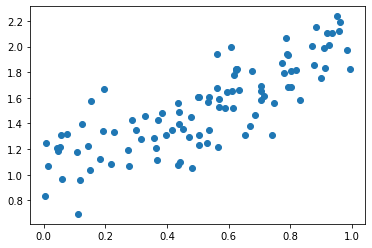

In [5]:
fig, ax = plt.subplots(1)
ax.scatter(X,Y)

So, let's see if we can learn some good parameters for the data. First, let's formalize the model as a function. 

In [6]:
def f(X, a, b): 
    return a*X + b

Ok, that was fun! Now let's visualize some models against our data: 

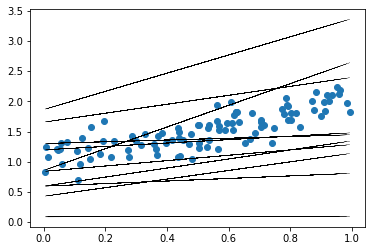

In [7]:
for i in range(10):
    # a and b both random between 0 and 2
    a = 2*np.random.rand()
    b = 2*np.random.rand()
    
    ax.plot(X, f(X, a, b), color = "black", linewidth = .2)
fig

Some of these <font color = "blue"> models </font> look better than others! How do we pick, systematically? Well, that's where the <font color="red"> loss function $\mathcal{L}$ </font> comes in. The most common choice in linear regression is the <font color="red"> <i> mean-square error</i></font>, which is defined as follows: 

$$\color{red}{\mathcal{L}}(\color{blue}{f}(\color{green}{X}),\color{gold}{Y}) = \frac{1}{n}\left[ (\color{gold}{y}_1 - \color{blue}{f}(\color{green}{x}_1))^2 + (\color{gold}{y}_2 - \color{blue}{f}(\color{green}{x}_2))^2 + \cdots + (\color{gold}{y}_n - \color{blue}{f}(\color{green}{x}_n))^2\right]$$

A term like $(\color{gold}{y}_i - \color{blue}{f}(\color{green}{x}_i))^2$ is large when $\color{blue}{f}(\color{green}{x}_i)$ is very different from $\color{gold}{y}_i$ -- that is, when our prediction is off! So, if a <font color="blue">model</font> has a low <font color="red">mean-square error </font>$\color{red}{\mathcal{L}}$, then this indicates that the <font color="blue">model</font> "fits the data" well. 

Let's implement the <font color="red">mean-square error</font> for linear regression.  The error depends on the parameters $a$ and $b$. `numpy` array operations make this very easy. 

In [8]:
def linear_MSE(X, Y, a, b):
    preds = f(X, a, b)
    return ((Y - preds)**2).mean()

Now let's go back to our plot of the data, and show how all those candidate <font>models</font> fare with regards to the <font color="red">MSE loss function</font>. We're going to tune our visualization so that the <font color="blue">models</font> with lower <font color="red">MSE</font> are drawn thicker: 

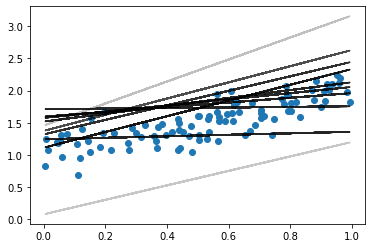

In [9]:
fig, ax = plt.subplots(1)
ax.scatter(X,Y)

for i in range(10):
    # a and b both random between 0 and 2
    a = 2*np.random.rand()
    b = 2*np.random.rand()
    
    ax.plot(X, 
            f(X, a, b), 
            color = "black", 
            alpha = 1 - min(linear_MSE(X, Y, a, b), 1))

Hey, this looks pretty good! The <font color="blue">models</font> that have lower <font color="red">MSE</font> (darker lines) "look close" to the data. 

Let's see if we can estimate $a$ and $b$. One way to do this is by simply generating a lot of random possibilities and picking the best one. Let's plot a number of models and highlight the best one in a different color.

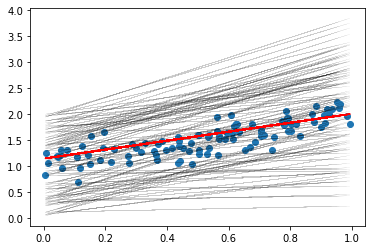

In [10]:
fig, ax = plt.subplots(1)
ax.scatter(X,Y)

best_a, best_b = 0, 0
best_error = np.inf
for i in range(100):
    a = 2*np.random.rand()
    b = 2*np.random.rand()
    
    error = linear_MSE(X, Y, a, b)
    if error < best_error:
        best_error = error
        best_a, best_b = a,b
    preds = f(X, a, b)
    ax.plot(X, preds, color = "black", alpha = 0.2, linewidth = .1)

best_preds = f(X, best_a, best_b)
ax.plot(X, best_preds, color = "red")

In [11]:
# true parameters were a = b = 1
best_a, best_b

(0.8636016969818487, 1.1484688275661288)

Of course, in real life we wouldn't determine the parameters this way. Instead, we'd minimize the function. 

In [12]:
from scipy.optimize import minimize
res = minimize(lambda z: linear_MSE(X, Y, z[0], z[1]), np.array([0,0]))
best_a, best_b = res.x
best_a, best_b

(0.9765299071953119, 1.015261733328459)

Having obtained the optimal parameters, we are now able to make predictions on unseen data. For example: 

In [16]:
f(np.array([0.7]), best_a, best_b) # model prediction when X = 0.7

array([1.69883267])

# Recap

In this lecture, we did linear regression "by hand." We generated some synthetic <font color="green">predictor data</font> and <font color="gold">target data</font>. We then modeled the data using a family of one-dimensional <font color="blue"> linear models</font>, and selected from among the many possibilities using the <font color="red">mean square error loss function</font>. Choosing the <font color="blue">model </font> that minimized the <font color="red">loss function</font> led to a good "fit" to the data. 

This pattern applies to essentially all problems in (supervised) machine learning: 

1. Collect some <font color="green">predictor data</font> and <font color="gold">target data</font>. 
2. Define a family of <font color="blue">models</font> and <font color="red">loss function</font>.  
3. Find the element of the <font color="blue">model family</font> that minimizes the <font color="red">loss function</font>. 

There are a few outstanding issues that we haven't covered here. The biggest one is that "fitting the data" is not actually what we usually care about -- we care about *predicting* unseen data. It turns out that fitting the data too closely can actually be counter productive in this case. This is the problem of *overfitting*, which we'll consider in a future lecture. 